In [1]:
%matplotlib inline
import geopandas as gpd
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

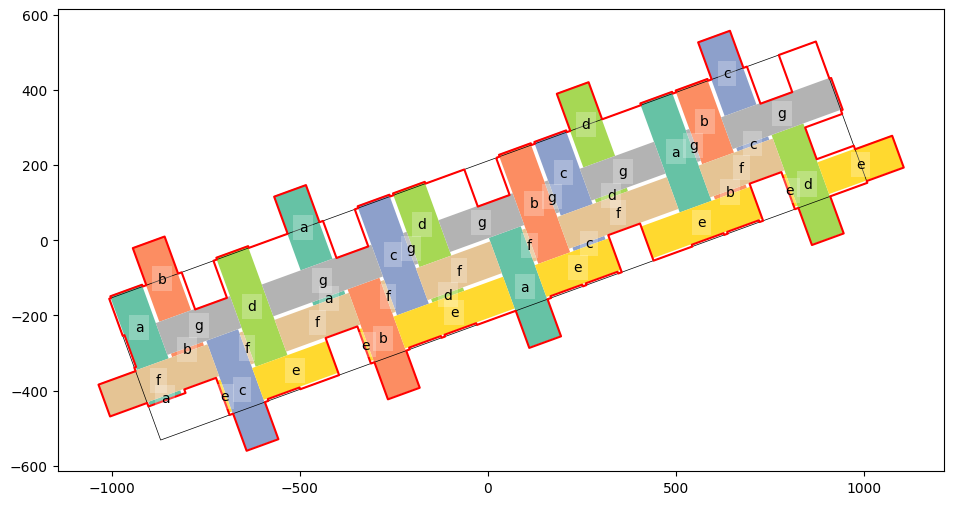

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = .9,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [4]:
weave1 = Tiling(w1, ak)

In [5]:
textile1 = weave1.get_tiled_map(join_on_prototiles = False)

In [6]:
textile1.ids_to_map = list("abcdefg")
textile1.vars_to_map = [x for x in ak.columns if "Rank" in x and not "IMD" in x]
textile1.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG",   
                                "PRGn", "PuOr")

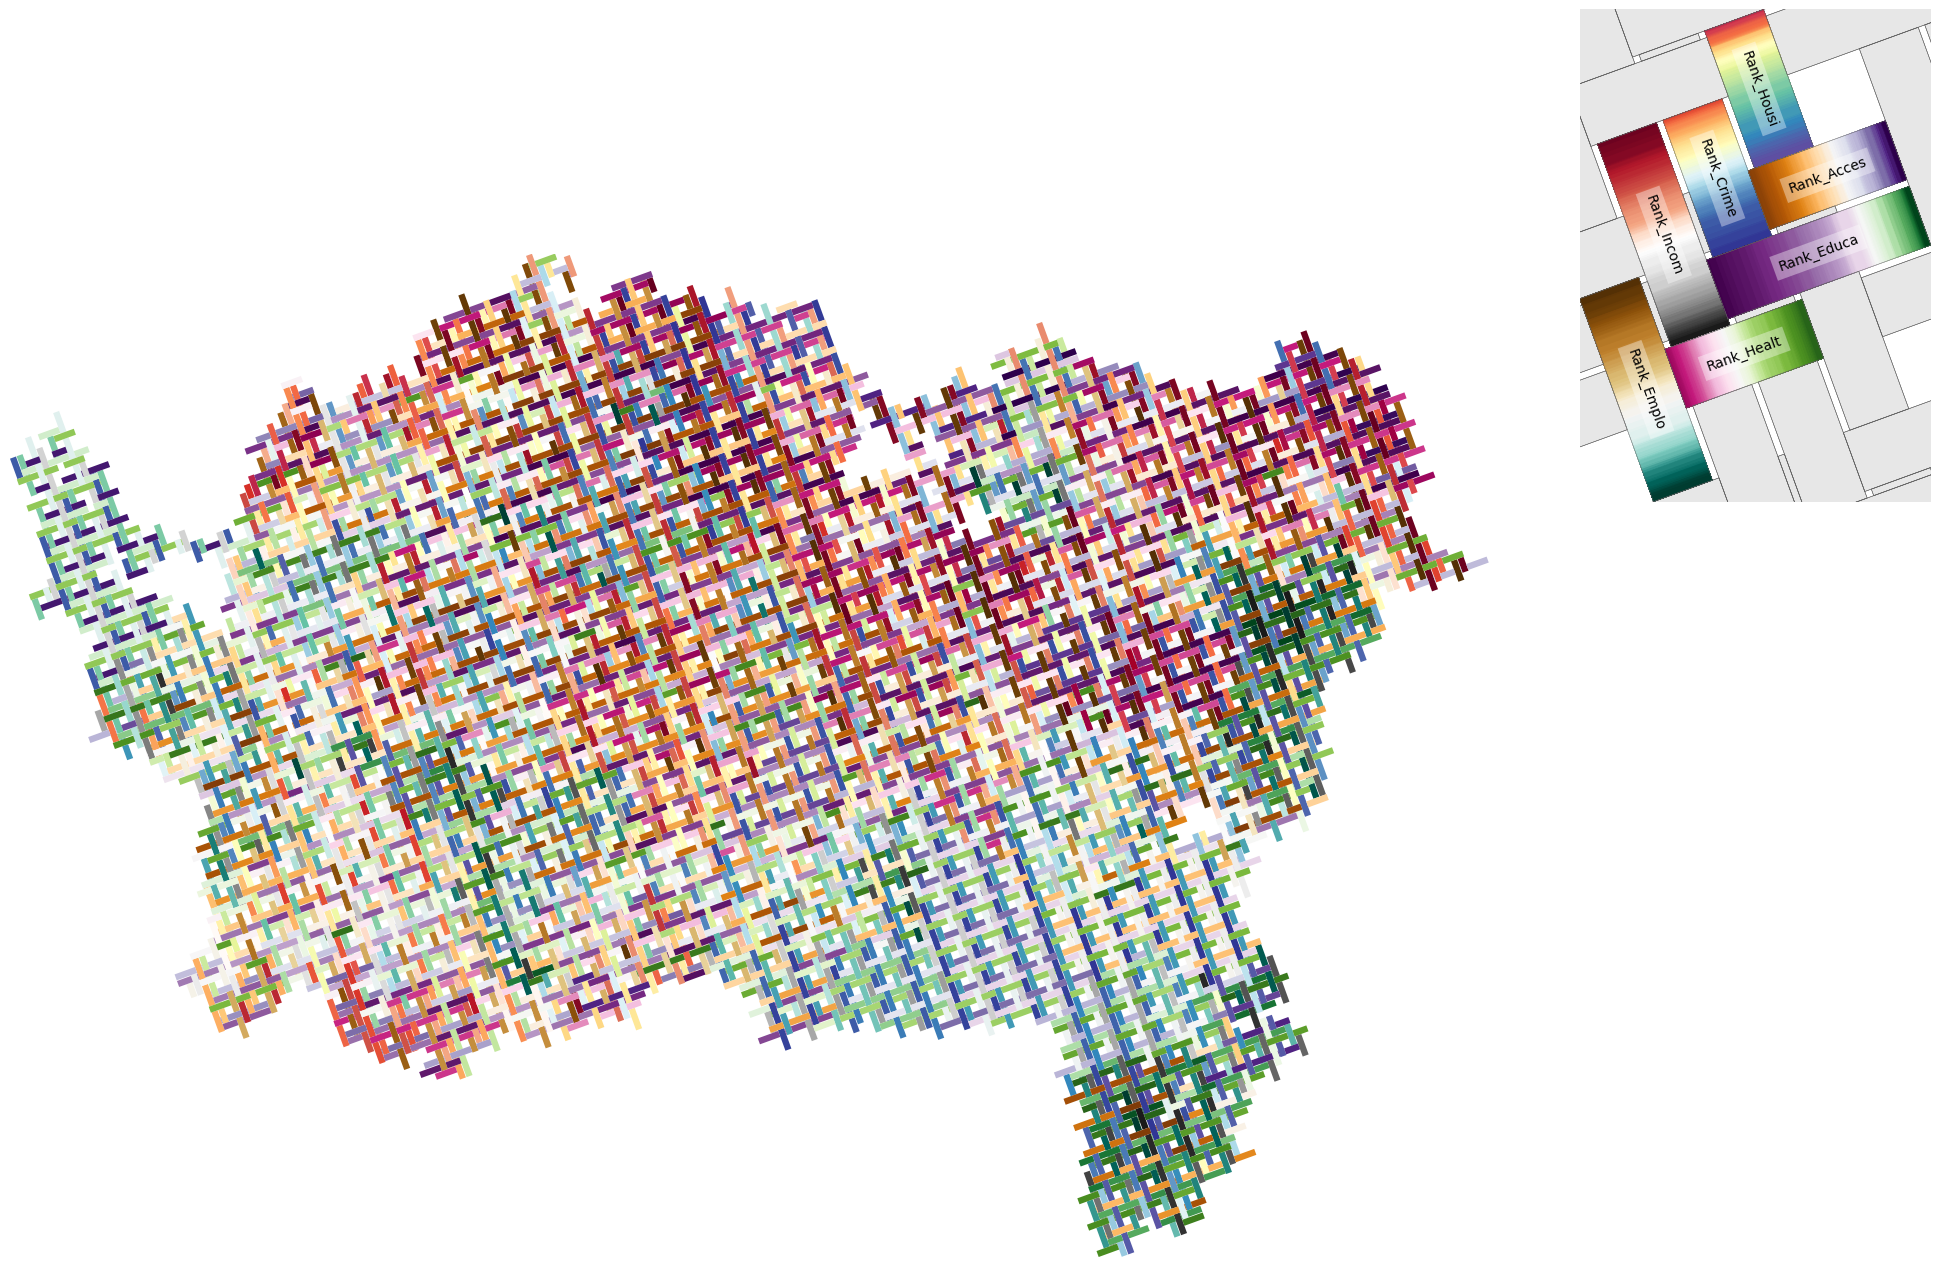

In [7]:
fig = textile1.render(legend = True)

## Triaxial weave

<Axes: >

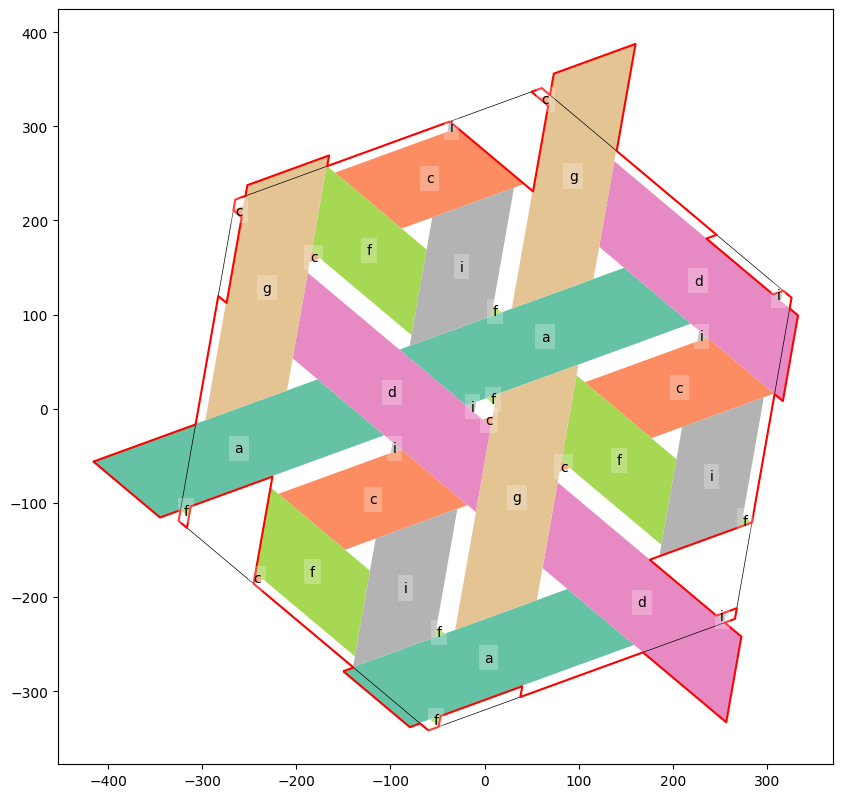

In [8]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .8,
               strands = "a-c|d-f|g-i", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w2.plot(r = 0, cmap = "Set2", figsize = (10, 10))

In [9]:
weave2 = Tiling(w2, ak)

In [10]:
textile2 = weave2.get_tiled_map(join_on_prototiles = False)

In [13]:
textile2.ids_to_map = list("acdfgi")
textile2.vars_to_map = [x for x in ak if "Rank" in x and not "IMD" in x]
textile2.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                          "PiYG", "PRGn", "PuOr", "viridis")
textile2.use_ellipse = True
textile2.legend_dx = -0.075
textile2.legend_dy = -0.375

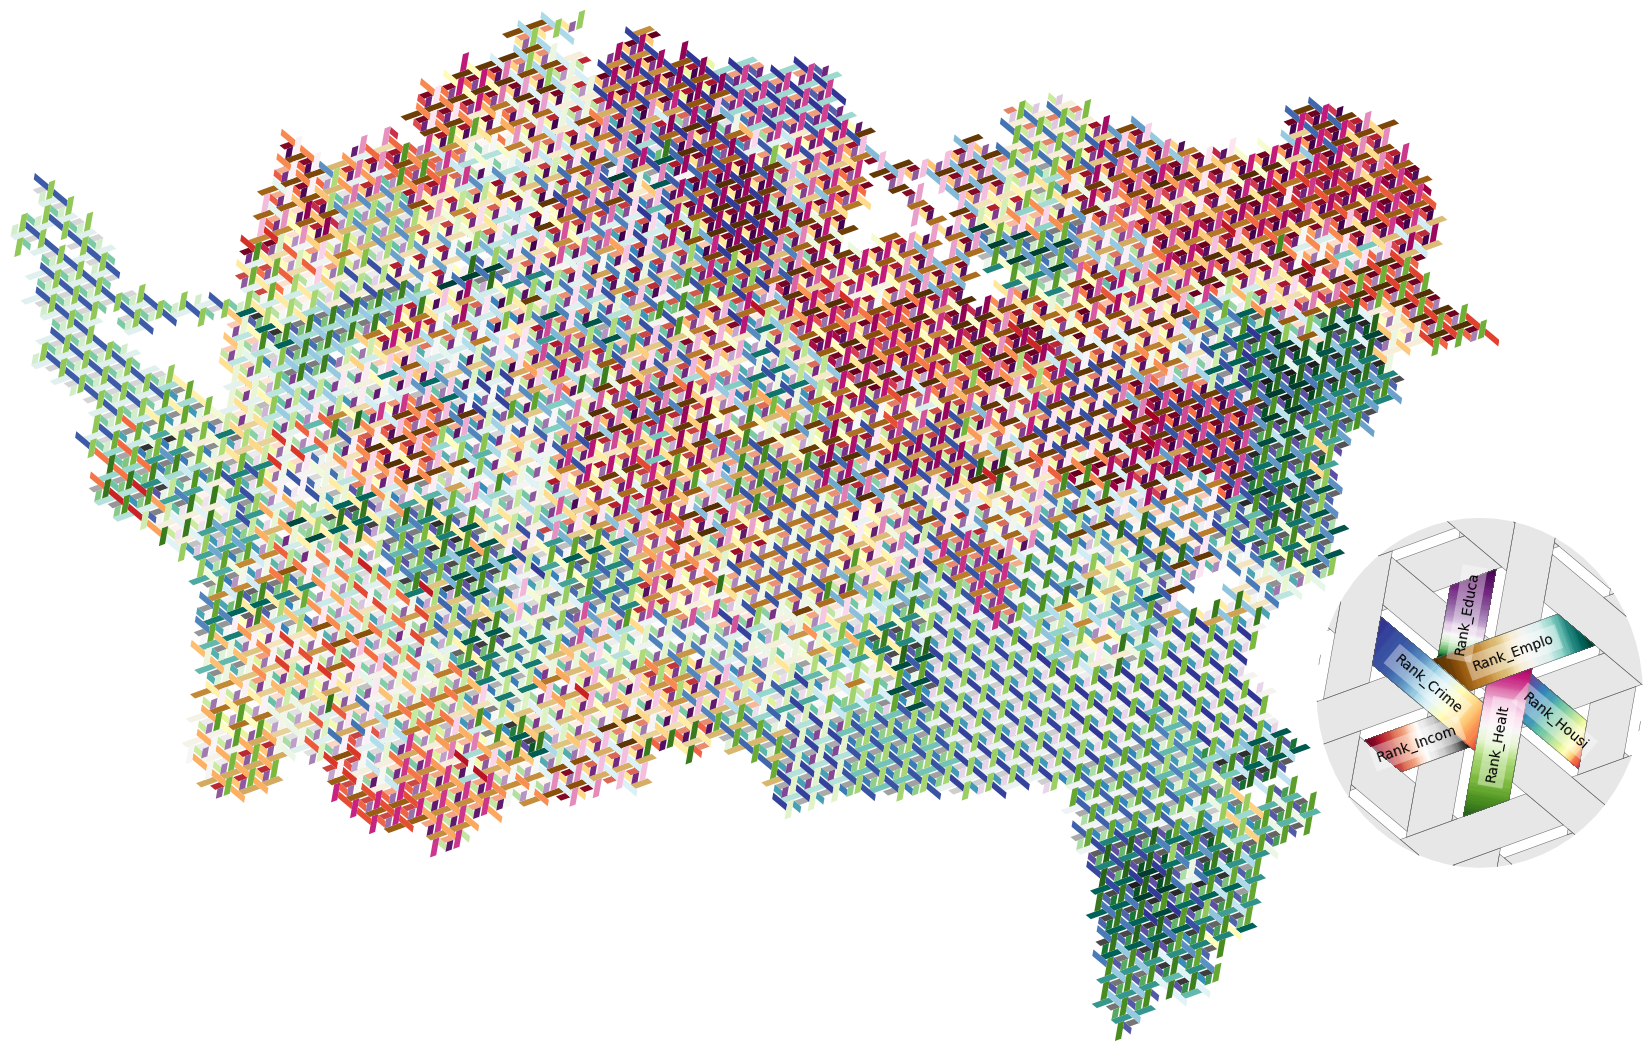

In [14]:
fig = textile2.render(legend = True)